In [67]:
import torch
from models import GLOM
from datamodules import MNISTDataset
import matplotlib.pyplot as plt
import yaml
from einops import repeat
import numpy as np

# Load a batch of images and a model

In [23]:
# Get dataloader
dm = MNISTDataset(data_dir='datasets', batch_size=32)
dm.setup(stage='test')
dataloader = dm.test_dataloader()

In [24]:
clean, corrupt = next(iter(dataloader))[0]

In [25]:
with open("default_config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)['model']

config['latent_reconstruction'] = False

glom = GLOM(**config)
glom.load_from_checkpoint('model_nolatent');

In [34]:
embedding = glom.encoder(corrupt)
state = repeat(glom.init_column, 'l d -> b n l d', b=embedding.shape[0], n=embedding.shape[1])

for _ in range(5):
    state, reconstruction, (bu, td, lat) = glom.forward(embedding, state)

In [35]:
out = glom.decoder(reconstruction)

In [37]:
from torch.nn.functional import mse_loss

mse_loss(out[0],clean[0])

tensor(1.4873, grad_fn=<MseLossBackward0>)

In [38]:
out.shape

torch.Size([32, 1, 28, 28])

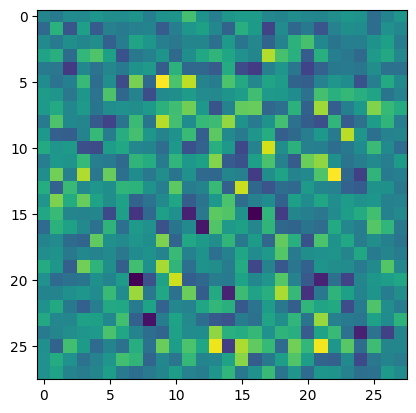

In [77]:
show_image(out[0])

In [20]:
out[10][0]

tensor([[ 9.9073e-02,  6.0271e-02,  2.4850e-01,  3.6581e-01, -4.6550e-02,
          2.1211e-01,  2.3714e-01,  1.9334e-01,  4.3016e-02,  1.9755e-02,
          2.5984e-02,  8.6612e-02,  8.9737e-02,  3.1466e-02,  1.0767e-01,
          1.9791e-01,  3.2153e-01,  3.5330e-02,  2.3995e-01,  6.7798e-02,
         -3.8075e-02,  7.1583e-02,  2.7815e-02,  1.6285e-01,  1.5832e-01,
          1.4649e-01, -4.2888e-02,  1.7596e-01],
        [ 1.1484e-01,  3.8208e-01, -4.2516e-02, -1.6489e-01,  4.0639e-01,
          6.5620e-02, -3.0431e-01, -1.3195e-01,  1.4000e-02,  2.0812e-02,
          3.1971e-01, -3.3005e-01, -9.0817e-02,  1.7650e-01, -2.0586e-01,
          1.5116e-01, -1.8778e-01,  3.7852e-01, -9.3111e-02,  4.7302e-03,
          6.3962e-01,  3.3106e-01,  3.7447e-01, -3.6491e-01, -9.1914e-02,
         -1.0994e-01,  3.3649e-01,  1.2686e-01],
        [ 6.5439e-02,  5.8752e-01,  2.7379e-01,  3.0682e-02,  1.8301e-01,
          2.8309e-01, -4.0853e-01,  3.3413e-01, -3.6258e-02,  4.7743e-01,
         -1.68

# Useful functions

In [12]:
def show_image(tensor):
    plt.imshow(tensor.detach().squeeze().numpy())

In [41]:
from sklearn.cluster import AgglomerativeClustering

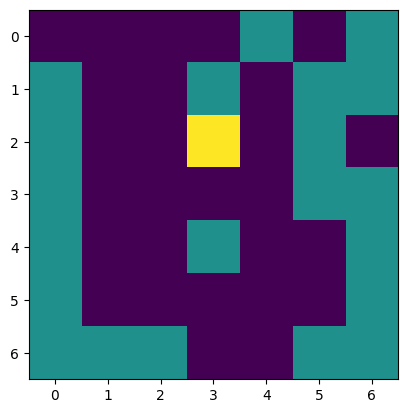

In [52]:
level = state[10,:,0].detach().numpy()

clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = clustering.fit_predict(level)

plt.imshow(labels.reshape((7,7)))

In [76]:
np.abs(level.reshape((7,7,64))[0,3]- level.reshape((7,7,64))[2,1]).mean()

0.39209372

In [68]:
np.set_printoptions(suppress=True)

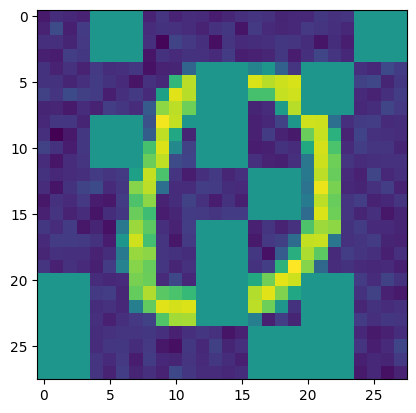

In [51]:
show_image(corrupt[10])